In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import multiprocessing
import logging
import torch
import pandas as pd
from torch_geometric.data import Data, Batch
from torch_geometric.transforms import Distance
import torch_geometric.nn as gnn

from utils import *

import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

from deep_rl import *
from deep_rl.component.envs import DummyVecEnv, make_env

import envs

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)    
    
    
from concurrent.futures import ProcessPoolExecutor    

/home/tgog/.conda/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


_ColormakerRegistry()

1
3
5
7
2
4
6
8
9
11
13
15
17
glug glug
reset called
[121.80969792833488, -101.63458125080128, 177.83607679282534, -145.65465638309823, -173.83944238880153, -71.24145485760694, -179.36447607507506, -179.9783400357923]
Data(edge_attr=[168, 9], edge_index=[2, 168], pos=[46, 3], x=[46, 3])


In [2]:
def random_policy(params):
    env, seed = params
    np.random.seed(seed)
    env = gym.make(env)
    b, nr = env.reset()
    total_reward = 0
    done = False
    while not done:
        choice = np.random.randint(6, size=len(nr))
        obs, rew, done, _ = env.step(choice)
        total_reward += rew

    return total_reward

In [3]:
def plot_at_y(arr, val, **kwargs):
    plt.plot(arr, np.zeros_like(arr) + val, 'x', **kwargs)
    plt.show()

In [11]:
with ProcessPoolExecutor() as executor:
    other_reward_list = executor.map(random_policy, [('EightLigninEval-v0', i) for i in range(1)])


/home/tgog/conformer-ml/graphenvironments.py:446: RuntimeWarning: Mean of empty slice.
  print('step time mean', np.array(self.delta_t).mean())
/home/tgog/.conda/envs/my-rdkit-env/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


step time mean nan
reset called





[-174.66648541516122, -109.95090866363655, -102.6662692308224, -107.6436222695843, 123.70074057706746, 120.23614316707939, 123.06849448491366, 92.29314873416709, -40.867029896609075, -20.179445221682663, 107.60257112625564, 96.87719925296634, 127.1117425121666, 74.20066126093067, -98.34763053354922, -179.2876749497661, 115.64938849568588, 71.44168660697925, -84.00324473726978, -31.072082770907336, 132.2357030004922, 27.071392564783523, -97.35856708696699, -147.8971948512732, 72.18842683145049, 70.41033709170996, 89.87492889329943, -160.11693740027016, -73.12208052175755, -159.88554918520063, -169.370130570075, 82.13620489936685, -11.484278771793594, -50.70727438872097, 85.54493578030996, 42.48141496879768, 159.92814559377172, 108.99230292219784, 78.70617030503918, -143.90764961667122, -105.51470787755846, 132.84973196067142, -26.501845420653122, -151.7250965653955, -154.03250385798347, -152.37190745750667, 135.22452065830583, 7.5834622171396, 74.270

action is  [3 0 0 3 5 3 0 3 0 5 2 1 0 4 0 3 4 4 1 0 2 4 4 2 4 3 2 3 0 5 5 5 0 0 5 3 4
 4 5 2 2 4 1 3 3 3 1 2 5 2 3 5 2 3 4 4]
standard 144.28859671479884
current 291.10359961115995
reward is  1.508325161612421e-64
new state is:
[12.613435492433464, -172.30723152609522, 173.03410542028985, -6.87396105905315, 123.21333643517754, -26.44150268294808, 147.2952846971968, 22.978312751605447, 140.14478075232995, 134.35154586968582, -32.71594219327581, -101.55226885640998, 167.79203814270014, 75.88009909334517, -170.82701079631153, -6.094357806696778, 63.6432509608734, 105.60369415302792, -151.04185456633058, -96.42894706757598, 20.458785733886092, 78.45589041015246, -56.13672299530724, -25.612324974606665, -123.71463907078275, 15.683724488187114, 158.00803483827445, -46.733577689448104, -33.917324301771146, -133.77067334596578, 90.63681015970843, 139.9662011656195, 130.12218634827835, 56.812030987740684, 144.6870957959578, -18.430136347234207, 15.527094383017326, 86.50254782428543, -107.459072

 1 2 3 4 1 0 4 1 2 4 3 0 4 5 4 5 0 5 2]
standard 144.28859671479884
current 767.0327948554008
reward is  3.055425541205801e-271
new state is:
[-23.187986776551575, -177.02056563827207, -13.795700262650348, -12.456194797332527, -69.69854843004339, -39.55320398956209, 65.80859173213862, 36.7260412630832, -122.44467063753831, 171.73512783569905, -110.08437347329415, -153.32327802083793, 80.98580734759784, 138.12267017621554, -41.29844902477946, -172.96971527076144, -117.18886142824657, -176.8612865822763, 23.85265003159233, 42.58741120855577, 79.14188612545993, 99.36479377830209, -108.71307358929474, -170.21396488772294, -149.30735697269574, 163.73353323474458, 100.347704364479, -173.1619965876507, 74.55999790660003, -169.3034800442447, -125.15747402092636, 177.05759946993936, -6.8134315111428485, -154.44298235214364, -56.33679426130686, -3.1072712508032265, 116.53095863039412, -172.10756611654986, -99.88572091508576, -56.097658272279936, 51.7799775693134, -42.840732266195054, 179.6737202

new state is:
[-120.199527411778, -0.040640487157985, 109.9531327330176, -28.24672681444286, 120.07904695179114, 67.75897320919226, -134.4815450518368, -55.81740144171096, -107.41825280336283, 177.30659482899503, 109.34502570414337, -57.750029889089795, -57.96641416147651, -161.32012871187786, -47.43896440801924, -2.3920077147006893, -20.51104591894213, 69.58591973306628, 71.93076989250014, 102.22703470238243, -131.12266274841704, -126.70763115990924, -72.75718130250038, -101.87026023687928, 129.95411190100748, -52.876867466305015, -77.36780953269215, -111.95990195384597, -133.49202964320915, 103.64202761095463, -79.87545965798408, 174.01778145240255, -122.34171921234348, 170.74339901729678, 89.74279626743886, 0.31709599577672687, 143.18543461029788, 100.22464982343465, 89.56388707681953, 68.63791621477434, 168.67373697674944, -93.74345653065583, -128.2416929433097, 154.08561624181445, -140.6203012462113, 31.033985767100305, 3.9052371651729727, 37.0609435750258, 142.99235488127567, -13

action is  [3 0 0 2 3 5 0 5 2 4 0 0 4 4 0 4 4 2 0 4 2 0 0 0 4 4 3 2 3 5 2 1 3 5 0 5 1
 1 1 2 4 4 1 4 5 0 4 2 1 3 0 3 1 5 1 3]
standard 144.28859671479884
current 389.3035913349205
reward is  3.394536222826167e-107
new state is:
[33.59609868582818, -172.7377281032428, -110.95051071869925, -94.05000480734698, -5.975451388180157, 101.95593253473959, -122.86929228819692, 80.82756675435729, -73.20277361362966, 32.89912143570259, -167.97202725607264, 160.5083128113011, 70.46613752366454, -44.46198791128277, 138.03630487990762, -1.2997859739295738, 137.95578224740953, 4.888719948019775, -166.9879180527548, 133.7143477095695, -91.14862845834213, 160.34653493536788, 87.9309236766159, -156.5839392260814, 60.72093538979285, 85.82892984845485, 19.80010912557821, 97.59173023792043, 166.46008598896398, -109.78993266559802, 64.83755750882632, -179.19760728689653, 17.59262676833153, 113.31231386356943, 175.09478208470662, 179.66983736182308, -110.38498108951885, 75.56274961460926, -89.20260874397137, 

current 142.12150126245032
reward is  7.596231490824002
new state is:
[127.40171724763151, 177.6052234707782, -145.05339203814134, -176.31728520415095, -103.54042499097189, 90.36347554227974, -165.07941263579585, -70.318629297357, 175.26081593478955, 98.68756013541952, -74.62893423521577, -62.47816346116787, 114.34170871018665, 40.66313348239111, 52.626861955154716, 178.8735389823479, -127.41809782809025, -86.70113213966677, -92.0263149687588, -154.1713587128498, -66.97552457625237, 127.6795653652632, 82.69068803907807, -150.00173220477944, -154.63404763669658, -73.124749266997, 98.0453515337481, 65.36507774165565, 49.4638093829966, 174.71890214843717, 158.02633668232528, 177.73787153650179, 118.35234568955141, -138.86743333272554, -124.79000787151489, -176.38398578948153, -116.10741354193563, 88.21166494647176, -174.47095558502875, 167.07448332192146, 53.22758269906644, 123.24918605683366, 9.595526384021216, -74.806849507596, -88.25587540261313, 121.02509051408491, -175.10388120064826

action is  [0 3 2 5 4 5 3 2 1 0 3 5 5 0 0 3 3 4 2 5 1 2 5 5 1 1 4 2 3 0 5 4 4 4 3 5 0
 1 5 3 2 2 3 4 3 5 0 5 1 1 1 5 1 4 5 5]
standard 144.28859671479884
current 152.82178500180612
reward is  0.0001712079820000346
new state is:
[-121.09646881658735, -0.4055707984652036, -82.9590487245911, 168.42034620862705, 75.9289705437226, -175.6375301679486, -35.71667885619969, -61.753580788224816, -65.17434910640839, 138.18406061382748, -25.5265936339401, 30.814442292225923, -145.2999688249726, -75.39832957319777, 151.69770910928398, -3.9973655521673277, -41.15461255206165, 72.33091538769735, -73.22843321523794, 174.08924593911982, -73.98799619654487, -126.12608935978976, 176.71457586363368, 116.52229693565191, -145.61060786615903, -70.84722412441971, 56.139886444753245, -140.81901440691786, 66.16734798408288, 77.78724422255165, 126.79812257883322, 1.6786376125236688, 119.18806176669655, -29.662458070344385, 91.88434724593286, -172.9687647592064, 131.8106338760312, -175.85112888581895, -33.9251005

 0 2 5 4 2 4 2 0 1 5 3 4 5 0 0 0 2 5 3]
standard 144.28859671479884
current 924.4786501364887
reward is  0.0
new state is:
[-136.61378155245308, -173.75816281780538, 86.81032873290503, 156.97118559485472, 105.29971542733671, 93.61977121756478, 135.95097332002663, -11.269501789498255, -92.43599069830275, 85.98679489693056, 29.06659540743274, 50.085348562434625, -90.1444418325423, -3.56918250759727, 84.14582715538161, 3.1838906087263625, 107.64002589056047, 44.992945337608546, 175.53656646048316, -83.60584225696927, -145.00247897150618, 89.28919234880077, -18.204754499653447, 46.534765606824486, -79.60761362060416, -151.97343741336303, -172.33491369353555, 170.9837697917815, -139.87324224624444, -167.03887863575392, 34.147977007739236, 166.17097175849986, 110.50343232525451, 84.76323424653503, 95.00070715158007, 165.70081703678412, 4.3630303584218835, 122.43411098466406, -165.270277891793, -172.32869905484992, 0.1246666426646305, -79.66632414953233, -153.69405357074493, 113.4348919027084

[-164.1515489920091, 179.29625844446133, -97.30416822700676, -119.42887296881901, -142.3483336821195, -103.57653720356237, -119.44140539201065, 133.3151544951305, -95.3964602530752, -140.01860795018922, -20.564754528752474, 15.82826268469298, 57.61260752465851, -152.66929247885633, -32.317618205205235, -2.392987182047739, -58.174655694399945, 131.2297815471237, 51.456331437264964, -107.75237861516317, 30.76204090130098, 41.21449987488246, -1.9696488424372303, 79.8290879022438, -123.7998974047161, 86.32998144456307, -20.22588541409353, 71.73741635021597, 80.46523919172185, -129.4658894367781, -40.49966072160324, -0.6090417782871116, -149.64465098543982, -25.767714746133173, -125.69179019162468, 8.253460714094548, 123.1666906147565, 129.29588128525674, -158.3520800128104, 75.62960387740674, -102.72499610684365, 157.07952879975235, 147.18928890371342, -106.02150268106206, 140.2863042196852, -6.983539160236646, -135.233122033937, -169.56270049208348, 11.293048001365056, -15.364928647185963

action is  [1 5 5 0 4 4 1 0 5 5 4 1 1 3 0 3 1 3 5 3 1 4 2 4 5 0 4 5 1 3 0 0 0 3 5 4 3
 5 2 0 1 3 0 3 5 3 4 3 5 1 2 2 3 3 3 2]
standard 144.28859671479884
current 146.06317261186908
reward is  0.1474864338140069
new state is:
[-118.24890912543552, 176.19979152826252, 157.95160837649672, 163.19849378143206, 81.24290098125961, 44.5158685854509, -101.45831221970437, 171.86101320657318, 148.8271958464935, 58.14412153456981, 48.113316377983786, -148.67903330556697, -114.46741538239651, -1.4817832355424456, 138.85693872179183, -3.905687491960214, -132.72169280016044, 75.15546943936036, 79.47387284319092, -20.18374648745677, -72.29779491999486, 104.56691513777045, -79.10082264512465, 79.29579472403124, 166.77030499689408, -179.5967512958822, 54.76179764423735, 67.77068862192841, -123.87361457781101, -26.486512171590537, 136.73624446251426, 178.46783697164818, -123.85915005905855, 94.1892767344391, 73.84997918180238, -0.8456465369210928, 116.34339737625072, 169.47178023030227, -174.469244602509

 3 1 4 5 0 2 5 4 2 4 3 2 1 5 0 1 4 4 1]
standard 144.28859671479884
current 146.08225311432707
reward is  0.14469899597536348
new state is:
[123.0048113791003, 1.7768180368262922, -121.82709916278775, 159.3171100647804, -63.49953110919073, -45.30162749717153, -10.062073522054488, -175.58598442066332, -92.4502823010211, -70.8796790305758, 135.67948122734677, -20.693496853891705, 100.83689205668144, 57.73178329053031, 79.53301316498849, 2.4054362938387275, -125.29418888057022, -161.5079466584824, -146.5394604026657, -71.04703280347849, -172.93324783409813, -126.1220498489887, -31.916850095547748, -82.43169316576335, 87.92335406449614, 69.80643869819367, -103.71347046419515, -177.63075283348184, -85.25804681900102, 131.70020729987058, 47.43702454554091, 178.16953451234502, -118.4039801295959, 94.49020222487557, 117.47357385861758, 179.87608885597362, -3.059592858314129, -94.49732451612341, -82.47524328161458, 101.0740521526962, 151.10306193656447, 134.2294679750208, 160.1023126790728, -10

new state is:
[8.402358238415589, -5.000034833876392, -53.36670460579867, 40.40926252557775, 43.84058945039121, -0.33929681444205595, -122.06037569832205, 15.812461385327518, -80.64849954737402, 167.83420503284253, 77.0480081827806, -67.2620614625631, 52.786299993698194, 56.908926743707035, -11.901066097176313, 173.9847474811497, 63.45486843322384, 163.09061105533326, -132.09223763436023, -151.47424202943944, 114.57221034336902, 32.80254048346777, 130.51752371502266, -37.45040915765187, -162.61378057498555, 29.234933223684617, 139.18002337739796, 157.06064595530256, -116.83041312682982, 145.11186334864217, -130.22609256470207, 174.63315231718042, -110.77564436278672, 81.8751052412225, 150.4727819647448, -161.7554876125438, -117.7178178063746, -117.27452365449184, -99.56042703873115, 98.21818676665535, -159.92313771653855, -20.4604715564856, 5.510069691957868, 104.24488625931235, 149.64508390766036, 145.98137075791746, -3.720621412279029, -140.50713983641378, -116.57078050405998, -154.5

action is  [5 1 0 3 5 3 1 2 3 4 4 5 1 0 1 5 1 0 0 0 2 3 1 4 0 0 0 3 4 5 5 1 3 2 5 5 4
 4 2 1 4 0 1 5 5 3 2 0 0 0 3 0 4 0 1 4]
standard 144.28859671479884
current 693.2904397349192
reward is  3.2431692683499635e-239
new state is:
[131.44865419500087, 2.2003444755322756, 44.149192118073884, -52.01647584218232, -85.76614870438371, -117.85307937398525, -155.72741984563777, -44.715384163578726, 85.03250695578443, 39.34829144651571, -15.434144042120797, 32.86692102059308, -100.25657303707199, -117.2380306689962, -168.56052950376423, -173.22594489102673, -169.44258044311619, 167.86505120042455, -122.48006323968175, -151.5610189494693, -59.94075108007459, 50.3172240384008, 45.959369915776996, 169.48056439960763, -23.763961059033257, -152.2531200158986, 102.22794633905414, -125.1049668897016, 135.6899515339901, 123.17274614739219, 70.08026755885349, -177.11340003845334, 24.61426526547024, 95.17187651468849, 161.13481295345397, 166.55924694250922, 5.745756494141131, 75.24112664510434, 58.1391585

 1 4 1 4 0 0 1 0 3 0 2 0 1 5 4 3 1 1 4]
standard 144.28859671479884
current 165.10165071933974
reward is  7.951445538625505e-10
new state is:
[-121.77743498442352, 5.772232383240675, -167.58402985474814, 95.50378941997685, -164.99006589574074, -75.97215521447859, -75.05403769495494, -83.07073259102543, -14.111257072232121, 44.88387355967624, -72.9321913113908, -154.75217558598408, -114.24323658441881, 153.9151546598218, -94.49797145439572, -2.2676210219393904, 134.18850347910436, -135.94903815481774, 83.46162102453071, 138.23163269236173, -35.65365311708027, 7.131499256790562, 121.9759800520796, 163.1050129051405, 179.6423507393758, -87.20163790867328, 25.189074143234233, 157.42563965785055, -79.99355228817791, -100.27576374896098, 134.69546539848108, -4.648334658683311, -136.18215194235194, -47.21349258569709, 110.53469634336442, -0.7350602522186882, -118.44338784100295, 137.96718094270014, 129.91808168369863, -89.92530975716633, 80.99593857542395, 145.32176314908682, 175.313091773797

new state is:
[161.14806597166825, 0.3490565385551135, 120.98384228479154, -173.56978747163546, 109.18333925761421, -44.70667708503312, 126.99741353830622, 68.34559786549463, 177.73272901259875, -56.41564440682943, -65.65372140254986, -69.41108959682984, 107.31719540958676, -144.5683948550624, -134.73301389935648, 3.8585463477157735, 157.78591532204115, -158.21694576259065, -93.26810834370413, 102.66341590770024, -149.9055018720438, -22.54701324878095, -88.53011014880329, -54.618154428840036, 175.96345667314054, -55.06710594391339, 139.06444062815467, -84.90902935181617, -0.07967869034562856, 131.86657678051, 134.7147348632472, -3.014945831636773, 110.27323042506873, 60.91027880040214, -82.6787052849869, 0.2751970258488018, -118.49504227864269, 131.96442087802168, -162.06619624869572, -96.16130319394134, -39.33698248952027, 45.15546297442998, -152.53004829141543, -95.79736273738834, 128.82303475707377, 112.54292902700395, -2.345910013655668, 107.53964944689427, 135.2975135436497, -42.0

action is  [1 5 2 2 5 3 5 4 5 2 3 5 2 5 4 3 2 3 5 5 1 2 0 4 5 2 5 2 0 3 4 0 4 2 4 3 1
 4 1 3 0 5 4 4 4 4 1 3 1 2 2 0 0 4 2 1]
standard 144.28859671479884
current 404.6487199253616
reward is  7.353189805733984e-114
new state is:
[-111.37928844937016, -179.02173254327187, -126.89089909231129, -50.41492184461193, 122.499840020699, -85.52410684476835, 82.57926687550518, 141.10556429158723, 161.59595165630566, -77.75607571459108, -92.63382495000683, -109.65987105512248, 64.30939053995783, 59.642634887134776, 151.44032815796564, -5.118270399631532, -125.85602180438414, 136.02437300717295, 82.32921512150594, 101.68150095340212, 8.629139627817981, 15.985393316974605, 157.05250003886007, 63.03939660485508, 108.88724030508371, -45.77912740885584, 75.78386331677623, -84.93608055058905, 149.01750029395149, 78.13287181401085, -26.39610433865871, -176.55894107070503, -33.17877601485815, -92.71643517092815, 80.65722102992822, 0.669891485515311, -125.90403397591852, 87.67361352127806, -168.71515255241

current 158.4682522671362
reward is  6.043582190946319e-07
new state is:
[-24.323802306680665, -177.21739150685377, -142.91701773043854, -124.3194028322138, -159.07469949687248, -56.599887111741694, -26.461267960986497, 177.30143067358046, -152.16046456147936, -99.07435336712669, 79.62588898403625, 66.62041227401257, 58.71573141271613, 90.50503690829336, -174.68435464990324, -178.9416028318027, 4.371322032912253, -30.080463395874567, -165.127590115855, -97.43812800634083, -95.59428365191758, 94.41319387068089, -106.84619105164461, -53.063517753564504, 176.71533247059142, -62.57038534999524, 146.94797969052263, 88.08058118279668, -132.1172077776418, -16.258603880366753, -173.6491506389687, -175.300777575528, -176.12175048321225, 97.93337566656196, -71.01556390823352, 165.9834111009736, -11.705287709917675, -88.0149241848952, -140.00059171875685, -48.92394800873945, -171.25900031687962, 76.74514569306774, -47.91946364899757, 129.87712471632335, 22.272418351371464, -85.77105352328009, 168

action is  [3 5 5 2 1 1 4 4 5 1 5 5 3 4 4 1 1 3 1 0 5 3 5 2 3 0 2 3 1 2 4 1 3 1 1 1 4
 1 4 3 0 4 1 4 2 3 1 2 2 4 2 1 5 2 2 4]
standard 144.28859671479884
current 161.04233320098376
reward is  4.606650744173731e-08
new state is:
[-132.77703406258416, -176.82025865546686, 123.3887484180734, -31.728190068184073, -55.65504280801699, -52.29991385929054, -0.049331292295950284, 128.12830510425428, 146.60597034413215, 168.16077880396637, 44.78324516226545, -153.2142187051075, -136.2437669952981, -56.914264439767294, 79.91058523619735, 7.911683432783688, -172.89980762151754, 90.32309084727979, -78.20461526307803, 171.97744566621776, 71.73799211902524, 41.68033961270979, 92.19763300714662, -62.002477683881374, -68.90851483733665, -166.91269080270928, 3.709254414471322, 37.05812349243397, -150.1502982630212, 134.08451337822945, 69.78332750138941, 170.29496978862923, 134.21783106556637, 133.06413241003614, -90.36749827828378, -166.48383999097254, 13.697753486904025, -148.5052758203628, 85.49873040

current 514.1606465145602
reward is  2.0232537599750005e-161
new state is:
[113.79118542597335, 174.81819404504913, 104.55086060081207, 128.98673418089007, 136.69374503026538, 170.91561610203513, -115.21703805721879, -96.38961356893448, -71.99461527535844, -162.62663120566535, 149.74313477819024, 77.96575556063404, -101.28413075907935, -71.46142211700523, -125.57148590517265, -165.3100582834096, 118.04964801356742, -158.37730173632565, -163.33575245407857, 89.36914641325333, 179.3292549178838, 0.6957311101546338, -29.59699014332715, 178.33413371176567, 73.86811433019827, -67.81774874381703, -171.64303188772914, -177.03096816235075, -97.29539703235763, 103.67158456098484, -55.20289972218529, -179.05418988689547, 112.24096526374737, -39.549318107493924, -54.74760564242022, -2.1148564275959734, -130.03467514091486, -84.62918214768501, 159.89063354089527, -168.56036144311156, 72.60764139051523, -113.7478721850693, 118.12134044970941, 107.8517454692243, 31.41990907671749, 29.650470375350867

action is  [1 3 3 4 4 5 2 2 4 0 2 1 0 1 3 3 5 5 3 2 2 5 3 2 2 1 4 3 5 0 4 5 4 1 3 0 0
 5 1 4 1 0 4 4 1 3 2 4 5 4 2 0 2 1 5 5]
standard 144.28859671479884
current 758.1924212893696
reward is  2.1105573728118527e-267
new state is:
[-172.80894805998926, -5.145400370904973, 18.18431366117835, -48.03348870797786, 153.65185069977716, 171.6091239882169, -31.33724258542198, -61.82313836178242, 55.897182485982746, 154.83286854254274, -24.859235622595072, -70.51689555803384, 125.92092987911472, -106.30446969198431, -31.177910366554507, -2.299224010054801, 109.13846760574424, 112.25010132729662, 76.43589086378309, 147.43661604979957, -68.84231060287982, -67.27570504102535, -96.98674284949513, -21.221970172814277, 176.79077333727997, -139.28060481461105, -179.66157909242915, -122.25887083370121, -149.26317728903584, -124.29252333644219, 10.745303175672943, 163.3005701176729, 125.30327814552969, 134.11784013035881, -74.66530935380796, -149.10932574551018, -135.82671141291746, 74.6552761960148, -109

 3 3 2 5 0 2 1 1 1 5 1 0 3 3 2 3 3 3 0]
standard 144.28859671479884
current 631.1465628178926
reward is  3.1601845479378587e-212
new state is:
[129.31267933950693, -2.142002759061792, -89.66218161323701, -97.69925132484667, -31.86159239041387, 26.696930100626705, -173.07438550132446, -52.21634248919495, 120.51405067450595, 123.24837258349642, -12.783033702336162, -45.006088155553364, 71.2616086882384, 54.447658280521274, 17.0855341234672, -5.813345397152003, 151.50066453356533, -23.698388964324746, 166.36537614140084, -79.0432607156368, -47.08192470891716, 93.64045802731772, 35.98932308418891, 65.08757246945463, 128.93765950730412, -168.6046319467135, -27.857005880602152, 129.00786784287013, -10.176321441589868, -119.67413462896451, 3.8471252420224276, -13.155158518336473, 4.126271709980578, 103.22594280730331, 155.68554796569845, 159.43579429686272, -116.50525585426385, 129.13534256694788, -160.66209208671773, 66.7987396787077, 170.46545113904537, -113.89792663786007, 73.1250641364753

[137.60733218310574, 6.332215183147627, 62.25719729670311, -123.88799807207523, 31.37894272159005, -113.1441741794805, 93.69904128696226, -43.2439689282557, -149.02402538687525, -157.65795216353874, -12.090449413552049, -60.91861256015728, -59.69911832848913, -97.22108806033233, -84.79790191598134, 1.1486988887666847, 135.07308566117788, 68.49444979452464, 15.933722164444331, -53.890451253979826, -71.20972230128588, -80.52855680222379, -125.63929184416023, -62.235163299172, -46.06828722067418, -169.85902976898151, 143.94322623667608, -151.798297404173, 57.43073079784999, -126.07779906188074, -133.49261913174814, 1.290512197154437, -115.5140603397516, 106.38307748422265, -13.629542662159322, 174.60051117166608, -117.54678063666498, -154.72933180151819, -95.98775705755547, 61.4152334854049, 174.38828138865853, -135.85277850832253, -88.0128578978188, 154.3551533358168, 57.963258178688804, 91.87696467912293, -178.43166109329613, -120.77467546923701, 162.63772387998662, -37.88258666401283, 

action is  [4 2 1 4 4 0 3 4 0 5 0 0 5 2 0 4 1 3 5 2 5 0 0 2 5 2 5 4 4 1 4 4 5 2 2 3 2
 2 4 5 4 2 2 3 0 2 1 3 0 5 4 2 1 4 2 0]
standard 144.28859671479884
current 334.9338385704564
reward is  1.3907979933447173e-83
new state is:
[63.620674987887156, -7.110768765619891, -137.94094195867143, 61.21070486449388, 51.901411591667475, -159.84391325283192, -55.82228732433341, 27.851152526828404, 152.96328980863143, -111.3716276890168, -96.05170782818725, 161.30448281317678, 59.78447611123581, 73.4275024928226, -146.23563189550853, -4.30693238484712, 11.562356785854062, 56.98660298454975, 150.1418401360187, -49.574360694707394, 109.25389417329286, 173.38120025947032, -137.58302725606183, -76.5086477341212, 75.18222073706137, -63.28967013124106, -172.9014810339841, 85.02839952933991, 42.03035621051404, -133.6259144878793, 129.6119874269287, -2.8560582505375836, 148.5842734779187, -107.17468338076196, -109.62086557063722, 13.972611596691415, -89.67440897848012, -56.5075410344768, -45.6183986722158

current 385.1795793024004
reward is  2.0980513644834903e-105
new state is:
[1.9952991377771143, -1.9508430002911723, 42.76106114713653, 54.635833258781226, 41.288334338732305, -132.23189470540643, 66.66551752258043, 164.04590878174568, -134.81339421675034, -32.90894966583361, 49.32772480574295, 21.640331681073896, 102.7019387647117, -131.58117900333926, -63.07201007804863, -33.2604115924241, 147.74306334497405, 137.42458090510536, -84.17118928642333, 57.804966088245685, -165.1006973377954, -5.019380003017849, 22.41880069004508, -41.520711739840856, -97.7948859437674, -80.06417590729733, 65.12769973133196, -79.40706973791112, -171.67105454188712, 131.80726548648457, -30.06902285601811, 159.94420913371292, 112.57510292768032, -80.77837114888129, -13.991741580071817, 143.35905436449798, -14.710430871012294, -126.29615973036297, -112.18946988622439, 121.40062259080902, -61.64008644583849, -81.32736066707784, 62.484891457674, -121.05152182681243, 135.80551244390668, 103.01345537951356, -11.

action is  [2 2 5 3 5 0 5 2 4 5 3 3 0 2 2 5 0 4 3 0 1 0 3 4 1 1 5 1 3 5 5 0 5 5 2 5 3
 3 5 3 2 5 3 2 1 0 3 2 1 4 0 5 4 0 3 5]
standard 144.28859671479884
current 194.33169697344417
reward is  1.606934943471146e-22
new state is:
[-120.72417867527585, -1.4351566640665805, 114.84216486031634, -16.516018307758213, 94.50587777525179, 70.99673046498698, -98.17402766976417, -62.467190542027446, 84.92949030391179, 67.50262948422652, -22.611159829940153, -123.44649318942083, -110.00889913258176, -114.12635644840915, -81.07370579335027, 176.3739785567176, 107.06079843085998, 102.7401968240235, -43.21852174088237, -83.92697625330126, -8.662184545812632, 33.43172469462676, -6.435928918368114, 142.58776681175482, -130.88307936738605, -176.33004785925309, 80.20178914841857, -136.26684508311553, 64.3374413984166, -114.69300238875617, 26.218095415193776, 178.06260305528048, 124.62043141698084, 143.2446612912433, -71.13690006554056, 179.3894595628944, -43.75677199766595, 29.23927783286095, 59.176003149

reward is  0.0004480149179490473
new state is:
[116.9444721512683, -179.4461245823175, 98.59789910430749, -56.61450476764919, 157.95297960448335, 110.759410252454, 156.68199406510337, 82.52711898506088, 175.71985021970252, 104.26543307552492, -25.425302310257646, 152.2348259309018, 97.0814332786802, 63.51701618343549, 142.15065991470473, 176.8286530699229, 158.287050638982, 84.9828128035024, -23.500368444464304, 96.52532712881076, 95.04102371651236, 54.15466532166978, -146.4215361521773, -52.2742076838201, -177.05941062832622, -63.63396559178421, -21.636564602225434, -137.75312856968515, -101.68047861648117, -112.45511882770748, 115.07686084001395, -6.047106183783129, -142.98009338757507, 67.47519342170861, 63.688142430323566, -0.9041618723444155, 129.19844476002828, -100.45223146986089, 168.58245584150876, -122.64617916597588, 63.055033096709316, 67.19486086219425, -99.6746289035625, -175.511280488548, -110.79498903083815, 163.0735906428869, 174.35631286543475, 114.82365069062199, 136

action is  [3 4 1 4 3 0 4 3 4 4 3 2 1 1 1 5 3 2 5 0 5 5 0 0 2 0 3 4 0 4 2 5 1 4 4 0 4
 0 1 4 1 1 0 5 5 1 4 4 0 1 1 1 5 1 3 0]
standard 144.28859671479884
current 142.04680913531388
reward is  8.185337099271738
new state is:
[102.14205739775987, -6.684853888796893, -76.01386134016037, 33.2583504955984, 72.10402892236284, -127.4905059181767, 70.41333495507779, 35.50086127029128, 32.06358348488227, -63.731584091333836, 40.39639117019584, -97.92918295388067, -117.24692614690493, 170.62361640918763, -129.84897740515098, -178.95704463309025, 1.588986744727486, -141.53499271103814, 115.67495505143177, -177.82390900131992, 116.05198055278846, 148.88580378743586, 143.82762580485965, -160.78267799187776, -124.77481567472574, -83.4099618879459, 45.34495124648129, 108.46428972246613, 160.8558236916947, 101.33342269446271, -102.66916351708052, -175.7910975397, -121.58600941396989, 127.77906724178281, 157.59924090524623, 172.98169895400537, -3.3200521740099327, -170.74011497477397, -158.325179555291

 3 2 4 5 5 2 5 4 0 0 0 1 3 4 2 4 1 2 1]
standard 144.28859671479884
current 140.4828417295
reward is  39.10740365256749
new state is:
[120.87387876515204, 179.71445398960762, -124.36974032919045, 163.59270540371963, 117.842386807581, -96.0986435392347, -170.17388873879133, -170.42258773611638, 156.63987608794636, 74.7516726873968, 66.92489441007696, -176.2789157297865, 123.64378411312454, -165.05077483846483, -119.38051287248742, 3.2923477106811894, -115.99991209488456, -86.33425422835383, -96.27732447009652, 177.88785752008195, 51.025593585715605, 162.34957957355402, 144.88336127613925, 62.13432229752657, 134.32581888781922, -40.36980849602381, -154.84314331522606, 125.27547255272043, -58.71330642634754, 178.4662892817105, -114.9798990501201, 0.014439959022500401, -122.2634578708685, -8.165405282868747, 66.62064627666672, -4.069881931266372, 77.05426053697077, 77.92965766288933, -84.61616001992869, 75.109493938305, 61.30586098220073, 61.11295098613733, -57.898722631604265, 124.4617994

action is  [4 0 3 5 3 1 4 4 4 1 1 1 5 2 2 3 3 0 0 3 0 2 3 5 1 4 1 0 1 3 3 0 3 1 4 0 4
 2 4 3 1 4 4 1 0 1 5 5 2 4 1 4 0 4 4 1]
standard 144.28859671479884
current 153.9513424641493
reward is  5.533035229827391e-05
new state is:
[127.64426501416555, 179.50975995760146, -41.83298061707548, 136.1057342763391, -23.547691299799283, -70.04725415374156, 68.14091155790834, 81.98980865125816, 41.37917872598292, 121.86883534211039, -101.39280742772617, -117.44581874982315, -174.3484328530522, -23.567621034427745, -72.02951590595796, -9.012250629299857, -13.553350801329273, -140.2407969828799, 131.29360646370745, 53.49067920834236, -107.24688987594065, -128.3306578640391, 76.71812546055385, 63.85258256495528, -161.03689897963483, 89.57483936205847, -68.75640303594561, 171.869551632715, -79.26479714876498, -47.84182485493517, -41.5421389478738, 178.87475735865817, 4.442794334698858, -104.59219060613565, 35.80902461794176, -177.38397142206952, 120.47872804663616, -80.26622305405257, 60.4020434918351

 1 4 1 2 4 0 0 3 2 5 3 0 1 4 5 3 2 0 0]
standard 144.28859671479884
current 529.3406441652405
reward is  5.169650000435368e-168
new state is:
[76.49468404776668, -0.6940524590773213, 101.2614857776198, -120.15263773673193, 116.30667410669903, 130.68294221409005, 119.57381709954454, 106.95328792999611, -140.73568520151983, -42.3123586569474, -23.095419417585344, -138.93727866687033, -142.44151754654234, 65.94408615544559, -20.429948809838752, 4.882168460592648, 172.29899328604924, -95.38681934240616, -57.06931922169502, 152.59038094320613, 52.990981977104, 51.676682327517646, -167.4184240135805, 39.36458154052364, -139.86982741705688, 63.82080358608255, -55.5470150501794, 83.19761306670271, -55.03956208710063, 150.69924949599178, -118.31894613924483, -170.15778529467795, -138.49951795577806, 63.88847286550091, -135.46672819574565, 158.92602202288063, -139.47742056475388, 106.06746438764894, 98.15499632678592, -156.09353270788716, -41.84624202111739, 54.06477576526146, -103.2487201179155

new state is:
[-111.48492530690166, 5.068488209251856, 45.45714159972167, 169.51094872840986, 82.30504786115706, 36.829210339974836, -93.83493521530521, 103.14372225537161, 85.09682480262258, 174.9345028002577, 74.5409948317496, -28.01113885305896, 120.97805128799847, 172.0846296390475, 34.08516549535619, -177.60391841200754, 114.53947938907207, 163.93423680954103, 76.56114719920788, 72.41386037743017, 171.6506963245527, -160.0912200805886, -8.447974047226445, 61.47287333557426, -168.44267061200824, 176.6579560559822, 65.57535597591168, -99.10406797330731, -18.584165175025433, -134.89668301327566, -137.27735374813125, -179.5938131137755, 13.218963250934442, 78.43738207965443, -133.46893914175118, 179.29112505544316, -114.70346340515965, -121.80619788391124, 71.8881020119988, -57.97388051743245, -65.99845588276229, 104.0759866472428, -127.37524871470023, -146.03819207104692, -142.3695365498101, -83.4375306358363, 0.013191401831203394, 124.73737697602058, 93.56347690015129, 61.8225792404

action is  [1 2 5 1 4 1 3 1 1 1 2 5 3 4 5 3 1 4 3 3 2 2 3 5 4 1 1 2 1 4 0 2 1 3 0 4 4
 5 2 0 5 5 5 1 2 0 4 3 4 3 2 5 0 2 2 1]
standard 144.28859671479884
current 399.15480800488183
reward is  1.788345423110733e-111
new state is:
[-141.06204391851563, -2.5228879634393784, 114.56912586421834, -161.19249926997432, 75.5435448041445, -113.28646920910421, -52.69909318502914, -96.51299815427035, -142.0440771095166, 172.92775226573474, -44.04662276090203, -177.41382793497488, -92.00285160811872, 39.57152213455799, -27.25075086378199, -5.2591171911186825, -143.31807722668185, 85.65919047004857, -35.63486978419086, 47.60300609019415, -41.62467965918978, -158.89651898472906, -16.0331821613644, -68.3162037478835, -175.2156862001695, -87.73315981704862, 69.38641889877469, -28.43411602901324, -124.23300299594693, -52.38403632528847, 158.6762381321043, 3.5357995061832233, 128.7429672306143, 15.786168615787695, -142.36060327590081, -157.8789440348108, -41.97025965227095, 138.89900390115963, 26.7229373

In [12]:
other_reward_list = list(other_reward_list)

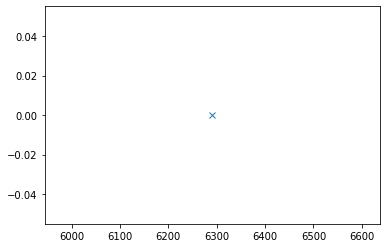

In [13]:
plot_at_y(np.array(other_reward_list), 0)

Text(0.5, 0, 'log Multiple of OpenBabel performance')

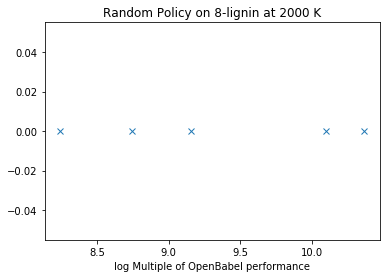

In [9]:
plt.plot(np.log(other_reward_list), np.zeros_like(other_reward_list), 'x')
plt.title('Random Policy on 8-lignin at 2000 K')
plt.xlabel('log Multiple of OpenBabel performance')

In [10]:
other_reward_list

[6290.546672096335,
 31758.18905836435,
 24384.59520371292,
 9482.780909513662,
 3796.294148791818]

In [9]:
# from models import RTGNBatch
# from deep_rl import *
# import envs

# model = RTGNBatch(6, 128, edge_dim=7)
# model.to(torch.device('cuda'))
# # conformer-ml/data/A2CRecurrentEvalAgent-obabel_sets_seven_energy_sum_rewardnorm-50000.model
# def loaded_policy(env): 
#     env = gym.make(env)
#     b, nr = env.reset()
#     total_reward = 0
#     start = True
#     done = False
#     step = 0
#     while not done:
#         state = [(b, nr)]
        
#         with torch.no_grad():
#             if start:
#                 print(state)
#                 prediction, rstates = model(state)
#                 start = False
#             else:
#                 prediction, rstates = model(state, rstates)

#         choice = prediction['a']
#         step += 1
#         print(step)
#         state, rew, done, _ = env.step(to_np(choice))
#         total_reward += rew
        
#     return total_reward




In [10]:
from models import RTGNBatch
from deep_rl import *
import envs

model = RTGNBatch(6, 128, edge_dim=7)
model.load_state_dict(torch.load('data/A2CRecurrentEvalAgent-lignin_high_temp_curriculum-120000.model'))
model.to(torch.device('cuda'))
# conformer-ml/data/A2CRecurrentEvalAgent-obabel_sets_seven_energy_sum_rewardnorm-50000.model




RTGNBatch(
  (actor): ActorBatchNet(
    (lin0): Linear(in_features=3, out_features=128, bias=True)
    (conv): NNConv(128, 128)
    (gru): GRU(128, 128)
    (set2set): Set2Set(128, 256)
    (lin1): Linear(in_features=640, out_features=128, bias=True)
    (lin2): Linear(in_features=128, out_features=6, bias=True)
    (memory): LSTM(256, 128)
  )
  (critic): CriticBatchNet(
    (lin0): Linear(in_features=3, out_features=128, bias=True)
    (conv): NNConv(128, 128)
    (gru): GRU(128, 128)
    (set2set): Set2Set(128, 256)
    (lin1): Linear(in_features=128, out_features=128, bias=True)
    (lin3): Linear(in_features=128, out_features=1, bias=True)
    (memory): LSTM(256, 128)
  )
)

In [11]:
def loaded_policy_(env): 
    env = AdaTask(env, seed=random.randint(0,7e4), num_envs=1, single_process=True)
    state = env.reset()
    total_reward = 0
    start = True
    done = False
    step = 0
    while step < 200:        
        with torch.no_grad():
            if start:
                print(state)
                prediction, rstates = model(state)
                start = False
            else:
                prediction, rstates = model(state, rstates)

        choice = prediction['a']
        step += 1
        print(step)
        state, rew, done, _ = env.step(to_np(choice))
        total_reward += rew
        
    return total_reward

In [20]:
out = loaded_policy_('EightLigninEval-v0')

seed is  33936
step time mean nan
reset called





[-97.03831965476063, -174.8648215348734, -62.05893726397458, -122.76724235262078, 99.10116763970565, 65.45149145885468, -48.89499771075319, 157.3287937391478, 97.2940971840589, 139.65959219659908, 100.00593340476419, -112.61201128317772, 53.442898781966896, -2.2987910206222546, -129.98007026090187, 166.0225400251681, 60.813159733901635, -99.1419766521178, 0.757793654075983, -34.38780697589451, 175.37130493503108, 56.99430743272971, -64.73687829413417, 44.57184769054096, 118.81972588526627, -3.6840427869137446, -136.27195847799698, 67.64852068142056, 11.226471245905376, 100.13462024088707, -174.81347056228185, 60.174243281054125, 126.23795185819343, -57.522730615374535, -125.38867552133564, -124.608333543933, 65.97277264315925, 23.94692224317579, 61.274389679668424, 163.64876813087412, 150.9210780536995, -171.80229825682693, -79.6896311282465, -167.00173123916167, 71.87054663455145, 132.529551301899, 152.3124845916775, -118.18865676354

standard 155.6226325726901
current 452.7303649591645
reward is  1.209753362418806e-130
new state is:
[-126.57887533579593, -174.05262493525467, -152.42669605545458, -50.54002793169476, -99.23936195162612, -70.78097376225816, 95.5309325438461, -82.20113658580173, -63.18715251715273, -179.88555429408828, 75.33919434998381, 118.81219489494593, 168.87247845302082, 175.464566218219, -123.37336912902009, -38.66625877622016, 169.02626582455068, 36.68244309089089, -177.23401443245564, 119.98701736888277, -154.6995709020413, 112.3344416151989, 21.390718185584326, 7.90523588730255, -153.75855815696656, 4.035895310180801, 35.29651776824988, 10.747296302877444, -78.85741204892335, -10.899739478831957, 82.38454289432326, 45.125736950142525, -118.96944709942115, -107.79427767798411, -33.2238517860672, -55.22893867018009, 94.34262184361202, -57.43839331751841, 170.80407436123423, 57.76870219940338, 55.29607381669392, 158.33144610858213, -138.95923127606943, 175.29478474088341, -5.3576586260760815, 11

standard 155.6226325726901
current 517.2536096418578
reward is  1.1497613823770183e-158
new state is:
[-145.54462979209262, 178.90692926395877, -14.694059827378528, -118.48362424175481, -135.17370728645545, -170.01964910341192, 76.4853742717751, -97.43871731973756, 22.672313335446212, 17.09759396556403, -117.36491664126314, 172.31645262090484, 62.71785966771842, 43.868639477107486, -121.573825913058, -137.6991061371845, 169.25869751100018, 137.40622367366518, 168.49226431690064, -0.5389293898925869, -156.34935734406136, -15.402913436312703, -71.84264286695468, -109.68949558003276, -145.9431102900043, 178.05179196485676, 127.2863666924077, 162.64513474814467, -115.06663846145744, -151.1722582352049, 178.37391513883992, -160.80776100147474, -141.8702433040373, 73.52884384694322, 14.258662132733264, -17.558241916369823, 123.72421777039283, -151.20893456952103, 70.14632271006326, -169.528377298476, -179.99392809057454, -80.39001746039851, -144.9947125841161, -176.53631442822635, -113.68908

standard 155.6226325726901
current 161.52096227113836
reward is  0.0003575473006472204
new state is:
[-117.9617219994385, 178.66959871792548, -132.9747001455349, -106.13760512768619, -115.5211755322627, -68.36661181156677, 176.4115016540853, -48.30970361904647, -133.08979845963168, 59.41111468985885, -167.24891813236948, 171.122763045821, 55.48555067839005, -108.22815525407869, -96.40904694006883, -110.9980502421387, 155.9031392191087, -91.9800099372333, -163.2560861955078, 12.85570368739957, 147.06386002301574, -156.9524896019292, 37.05653923577589, 85.7986336798, -135.27677604487917, -0.937147546604228, 68.59016467944471, 155.49601228337957, -110.20601644786606, 177.03826605670733, 66.18528057461184, 153.2969213936857, -170.39815291834694, -95.40478875898216, 16.260157626615104, -59.54038016721776, 131.35905261068456, -33.668434156196696, -163.49425097065173, 44.22459028237193, 71.93240198182595, -138.55209094952207, 127.26619723827433, -178.68487096808167, -107.32648016169699, -173.

standard 155.6226325726901
current 549.4516102156402
reward is  1.1945208652431493e-172
new state is:
[24.52942206286242, -173.73498103289617, 161.36783880874, 153.84524345956257, -122.70331007583502, 69.5027671392483, 125.64515712757877, 58.84206023805325, -146.16462800327386, 62.05155484699092, 177.8820858923444, 177.59524453357625, 73.67855896061418, 90.77522922216384, -130.18417980942073, -79.15478874422136, -147.71485756897064, 156.5275153233843, 173.65197217573618, -43.098589237722685, -169.7491157205321, 125.51422380349598, 161.3233778001536, 116.46377003928754, -144.12411586924807, -179.64278785386887, 119.21406563880309, 99.23808682818253, -47.53552894314329, 89.30126985155896, 144.52383782030324, -173.61999231027906, 174.81738959610925, -91.9545865569219, 52.6583692445636, -44.39960418165243, 74.26826887472505, -55.668387709158885, -113.80365102301603, -80.74843285973164, -98.89222626043191, 160.80294560528915, -79.50674163747225, -179.0053687487356, -2.5984689539613366, 171.

standard 155.6226325726901
current 347.1793205824122
reward is  8.374000255771176e-85
new state is:
[-114.60087451112773, -174.40708324575357, -134.42893905636805, -114.58464637853474, -134.18441185211253, -67.07867996442958, 139.111305195834, -92.61051894434475, -25.696228384109173, -5.867555993361093, -118.1720041612475, -127.30451898480881, 73.91094937177779, -144.21007281843362, -95.07158879247116, -166.6996270426145, 82.71712428170757, 132.49801416256744, 168.98132890687998, 92.71692247400135, 117.99133266801398, 146.5222335561033, 92.66444329131915, 153.82739226229612, -157.9092184537228, 3.192927020215884, 109.17483580116583, -174.51031548722057, -92.62790579684624, 99.96098664377092, 150.50679580122826, 172.2079653106833, 110.31978607238084, -170.7886885008463, 145.81398964237655, -13.938999629477223, 104.44161930869954, -121.75611538921342, 139.42542043345534, -68.81173263710805, 74.14856993423872, 166.34211623695975, 175.4513217796145, 128.41631879135846, 110.68384312408108, 

standard 155.6226325726901
current 862.6675779973457
reward is  1.1200238960957127e-308
new state is:
[-117.06638860468802, -179.2550632290831, -144.93782553451078, -120.15009149011374, -137.239212271522, -68.96413963897999, 67.06712781221407, 101.4471382510808, -116.42364908695396, 160.03208301528994, 55.11148720350807, 145.53950364158572, 116.46281691281273, 116.82587733280135, -56.267699225002495, -116.94762353721171, 168.7862575175553, 99.40414302107317, -179.4082832879354, 128.28271806704294, 170.55820196464438, 117.77164047874119, 159.85333861272974, 135.88344991435753, -50.48670861723458, -175.651743539258, 6.893589566250482, -174.36281656069414, -137.07448649429386, 49.861896154594355, 82.39246638995958, 135.66732612859212, 72.9859146719448, -108.82099487120674, -170.2196920816305, 89.81789721299118, -99.28374296741369, -79.84903583153864, -59.32129518905663, 73.99321544045878, -157.30915233958368, -178.37587205060856, -169.8102366458239, 171.21764823593725, -122.46383600145516

standard 155.6226325726901
current 380.4544254166781
reward is  2.963047103777262e-99
new state is:
[-104.08486862586004, -178.73690662322028, -150.86568680575778, -82.19216341477582, -98.41327389495034, -75.8857273005902, 128.90271017496863, -107.37281955814949, -67.6652116127477, 16.649389015477134, -116.58256008215749, 70.33757111835159, 48.12163009914044, 52.71181524638077, -146.41343706218154, -117.84107547425859, 159.9007382476317, 157.65636215958358, -169.22894290911754, 7.333625538758299, -164.22481726349733, 58.27677183253135, -142.01037620252256, 86.04861508908338, -123.49019593890011, 3.036571792753466, 146.9612490959025, 108.32908289155297, -20.62792123382821, 77.9522311037255, 121.85473425041377, -159.1343513974691, -175.84369196877805, -66.85162522656603, 54.879029755413555, 8.76962631282781, 113.87936835510398, -81.12451463362503, -116.09599702052193, 47.21753383395843, -31.921159674484247, -87.45064558693446, -141.14438107943707, 178.56285264732867, -117.16268254818718,

standard 155.6226325726901
current 978.1404821057799
reward is  0.0
new state is:
[-113.45669917878244, -178.92152467236613, -95.74034880615841, -94.76617902960689, -151.43255534324769, 171.2456998001115, 137.1732101014685, -105.98520582496153, 60.390007841657045, 71.4180030806458, -177.3962543311818, -170.7980938378328, 62.41649249914276, 134.77643956276208, 151.8835013822515, -118.48747338880193, 130.9696264284526, 79.02990694443095, 99.0125587496174, 116.70351076200086, 73.5181975650419, 114.10538736612949, 126.80410434630471, -106.82799187931245, -31.92495092448419, 3.7070536728279593, 151.806708979443, 17.658862630959675, -23.8488345932182, 108.97912370545554, 78.7227933097787, 96.22837056314151, 141.0922250193342, 137.61326734546648, -164.2705711333667, 6.392244296880802, -77.7906008014618, -139.26637217463565, 70.34661676031989, -167.03903885425902, 76.94253633352034, 136.5613651850139, -72.97138760326509, 169.36038018762883, 129.45779365544914, -23.529989388621033, 153.53316460

standard 155.6226325726901
current 207.50810029270983
reward is  3.813934430381565e-24
new state is:
[-131.75890411675059, -179.5120930136432, -166.40409131137707, -123.86036100882045, -113.91195185963099, -62.79934926667421, 170.19863219173362, 163.56863994378236, -85.87520980535993, 142.06671649092098, 115.61006316725387, 127.00175590991803, 143.65342527408723, -137.17569196531986, -125.45811031086214, -112.15840609498332, -163.5731254759221, 99.65367931724103, -178.27395125991015, 13.858358164810271, 98.03694282664699, -47.25423585531277, -73.32525494919521, -34.24772222806507, -88.09809336650645, -3.525073050734454, 123.9767033503247, -175.57295536998527, -144.37783124911823, -63.332544466317906, 102.52037824103185, 72.02299261788465, -171.19925373227008, -144.6336802358367, -158.77048587591779, 121.40969371886807, 105.0644211742542, -99.48544338848018, -23.655538900563602, 58.297757651149425, -61.88569337318553, -86.99610834037426, -153.13387497780283, -171.0847318654473, -98.4258

standard 155.6226325726901
current 387.0553384270987
reward is  4.0271560592742966e-102
new state is:
[-115.35691453241212, -176.58233854584526, -149.9022859978598, -106.3978381395946, -152.5167636356724, 177.86634129155448, 93.13192790681649, -54.29237012512182, -24.626161566351993, 30.744029240986645, -157.2464822456308, 163.2283216591885, 110.19850348589137, 106.73291999299205, -82.77833072617608, 158.55293547550792, -169.5697694887442, -92.75063936760272, 0.5240729325239318, -107.93801676241563, -179.01184632243252, 81.740283696243, -167.29792171793787, 103.96705749345594, -37.87392620051271, -178.9487693908953, 112.43424110314976, 122.32392393179353, -134.64315972507478, 99.11581557012738, -179.70876506435172, 62.79923075188394, 101.03662621223582, -47.50757666073246, -137.11630887194596, -69.98905000457397, 108.57851681695237, -160.99314434412008, 122.08681415053263, 78.29329837986107, 105.7030018207061, -120.72931183228292, -122.22263903926962, 4.798040869815329, 33.458931613115

standard 155.6226325726901
current 782.9552363641109
reward is  4.654332435160908e-274
new state is:
[138.84871877188723, -0.5835289173835013, -110.22305852492279, 152.92000642807642, 51.3710909941632, 151.27879958144533, 27.88158967135114, -69.84141144484673, -146.0160472204877, 14.497913539077066, 169.74276591094528, 157.58496349084942, 122.71495031878192, 81.40831474447856, -58.56942939379687, 161.723582671182, 167.06266969003835, 159.8954699546046, 10.051770212187519, -93.09506176990048, 165.84704185444798, 153.00074020768128, 93.34706973334374, 32.909156086889524, 171.85753348282182, -149.1645928583559, 134.82592722542432, -100.51403563249852, 117.12344774816502, -95.52636284154207, 170.37379042684063, 88.79131255379299, 54.04870129701772, 101.4217902139194, -177.0900575824588, 132.36299737421723, 32.638359966507835, -115.16536755083419, 67.73987409755564, 81.17437976045129, 149.29899498228795, -91.58568378867555, -144.0090672317301, -161.81973782837136, -125.36239070794846, 127.3

standard 155.6226325726901
current 425.2981679273949
reward is  9.916276668016849e-119
new state is:
[-127.76701187536824, 172.95348756150764, -141.62450629928992, -96.94306838495766, -107.6928707762749, 55.54758460768995, 130.34277213707745, -120.87358401008252, -147.9166455764959, -166.75095773570317, 34.510391880280814, 124.98973045411215, 160.0751740580002, 86.68743303643149, -129.947868103212, -104.68001273690703, -49.09994288209124, -27.85165675370189, 176.6035407773438, -121.41344471834078, 133.1690198266217, 132.04294863951858, 133.99248537065566, 14.011413168969952, -18.93949478784151, 174.58742723897834, 66.98876728745623, 143.21505758417365, 176.09635744271543, -76.06651656851905, -156.82747070992636, 91.70626629425861, 152.9549347315974, 94.73041240553543, 148.8977708577848, 49.299955970285424, 105.84635752187594, -58.727198937912156, -73.27991415994933, 72.52506795269032, -49.44304950930366, -63.40878725229774, -105.07600336345466, 175.63157092967833, 127.49069872967262, -

standard 155.6226325726901
current 454.2959642844132
reward is  2.527933761152335e-131
new state is:
[-127.65115714121626, 170.46803973250533, 165.81243510072787, -35.1565689832703, -69.97007974767503, -91.86803191237057, 85.75006689687261, -72.11214617285795, -34.56838489814022, -140.34578672983832, -38.12471665703357, -169.53301114827323, 53.733670723208654, -104.4062173487145, -15.665178300798564, 156.68601930279453, 126.75314877729332, 156.06954435956035, 175.68765836293275, 121.53479271289578, 140.16522031344505, 172.0784956261566, 31.09973582776629, 116.73284339872266, 46.570069439759045, 9.785883118806487, -110.11743015367347, 71.54061292817542, -176.60114144928266, 66.82780491812197, -51.30075017343438, 83.49637046030176, -134.57612355658787, 62.81059458114133, -73.08535721292722, 23.415587965087536, 87.35626706429595, -149.68881223312908, 130.71768085363868, 72.31581718246987, 104.35579779648349, -161.4151469123547, -130.29178063364637, 175.2742150258323, 125.81616096885071, 1

standard 155.6226325726901
current 168.57335188054776
reward is  3.093995032025165e-07
new state is:
[-122.90437254700957, 175.6321540615265, -113.5265784947975, -32.80339194674241, -169.38819958893905, -170.91627835624394, 74.5526754758959, -31.433115369871246, -116.03013585142519, 122.43544348219325, -75.43780676181818, 168.65552975933105, 86.1427965361773, -125.62767898376691, -126.84624998588929, 27.37757653843416, 109.70644054090413, 135.71608538618602, 179.64625823771007, 129.97192697555968, -30.50061891378455, 57.358337305715686, -147.8485142920421, -174.45583653797527, -144.97666163428454, 2.447845075018586, -111.513050675523, 177.39182319543832, 151.163859675761, -124.79799047339804, 130.6465523750816, -170.5213967101692, 58.73284594563006, -41.89393040703992, -101.712883577949, 134.26999737701667, -107.74953881178142, -55.353102287262175, -132.89536897389863, 53.45180745897492, -20.520739697817604, 178.62670198912892, -123.86467366478935, 179.58581329673828, -116.863410579455

standard 155.6226325726901
current 387.55331258481806
reward is  2.4475469464636853e-102
new state is:
[-124.5717728825973, 175.62875318114746, -132.47009361992335, -87.91976491643534, -69.95396281680148, -72.41324910949076, 100.11500659566292, -45.3883640849766, -105.04678022420744, 15.20004894866932, -163.74836816223083, 169.42367101276673, 85.82012589248596, 108.56695545280299, -84.98123011881552, -101.55861439339557, 175.12009425483686, 100.94539375764118, -173.30281350983245, 120.14335872106503, 79.85511277910854, -150.28225316741347, 60.587719742995546, -118.65359611255616, -133.5069515886671, 2.509711352891172, 145.4443342896297, -90.22222214959773, -70.39281371749163, 82.72981423857352, 42.894699469477786, 169.70558336788181, 169.06028495776076, -99.69307476353575, 177.19454645741064, 56.0815832808559, 92.04775532109895, -57.64541160041226, 178.1609299710311, 48.94675684930726, 51.265474357740814, -141.72082699145284, 122.53940332689875, 176.40632637033417, -2.6570059635050023,

standard 155.6226325726901
current 532.0161357743856
reward is  4.459889302651741e-165
new state is:
[93.50853175368057, 171.20384410435778, -137.06889889560495, -112.37560837886792, -60.72063634915752, -140.2369694978699, 99.35300140144685, -112.0245124853777, -77.73689415406417, 158.10872445393431, 67.20938907175459, 151.04345355157264, 134.03578003456795, 119.33201969096245, -102.04590640370068, -50.954163777767526, 121.3750865181194, -51.36482101961463, -176.45600811453406, 175.60923815458546, 139.45583904069494, 178.77684130125294, 31.99809050028116, 138.77828955521733, -32.43373639261633, -168.8575348364078, 88.01245683051216, -92.01941542185689, -108.78645430684897, 79.53665612120453, -70.81326948058738, 107.75832625751623, 147.10466851614046, 97.05179763963343, 164.17575722524754, -102.61659568588725, 179.46393401608296, 175.7252081305259, 95.30323783821737, 42.33287559470302, 79.78015739173715, 118.4343964101877, -68.52614147216674, -148.95975665636752, -176.27905904933252, -1

standard 155.6226325726901
current 703.1194985104108
reward is  2.1881536175756813e-239
new state is:
[-127.50018100518506, -175.3522365557935, -73.45581372571584, -80.01499383434538, 173.07913270672998, -52.34847570610434, -161.4471366194485, -32.540910425278824, 7.403541701799476, 35.61812792428553, -136.3460857482305, 79.83287385185388, 101.15664902211127, 139.56730647816204, 171.45894437572525, -174.79205980146372, -179.95165117329233, 143.28940141691788, -173.22383004963487, 118.89730246655934, 129.6495781005019, -133.5752959715475, -154.77417363643642, 133.590195145199, -118.29746764686281, 177.06718454240573, 126.42157666071598, -167.19126021703482, -132.82914153468545, -151.64715249585282, 130.65559443079528, 137.38719919275027, -64.17927844887227, 76.31330663368861, -167.11394573818552, 116.2696162869954, -166.86742284963813, -152.17176554563906, 124.25336524624437, -153.05141463506834, 88.93114030871753, 165.65796000075323, -88.51762230318515, -1.2824115239340983, -63.3190801

standard 155.6226325726901
current 635.4017119559139
reward is  5.617445082560897e-210
new state is:
[-127.67048667513653, 172.751129099859, 4.9287938418372415, -105.04868621618257, 158.42106681474854, 170.8300730947973, 48.28893183271104, -113.769636938283, -100.73809320146796, 153.6040884853463, 70.51375430331333, 39.84139851197937, -161.39392160566422, -131.07173128359295, 169.42194512527135, 11.288591782939314, 88.89088334496688, -88.53254716368416, 173.08531356941162, 67.71225983873208, 40.47197554165767, -143.49848022322348, 153.6716449769542, 145.00122108167594, 71.5327796978865, -163.1235584357852, 136.91202064247088, -106.11037385958265, 143.4543435220592, -77.03851668014651, -176.51112192019085, 83.60982271489812, 46.66340920425277, 28.062234961147652, 178.95769421795376, -4.161088159994151, 98.09851439873455, -130.99642505567286, -171.44132120432306, 97.81849131712113, 105.55533041057313, -155.65804786893602, -95.23742793222215, 174.07326105888168, 135.3148381914353, 152.978

standard 155.6226325726901
current 450.5269436214527
reward is  1.0955458704048167e-129
new state is:
[-124.62676413186851, 172.10859615886312, -112.65796876810228, -116.7027242503526, -131.61723423777119, 170.51161333640925, 57.494801425593316, -101.25195843088134, -177.5991561075511, 121.17597771417775, 133.72772585149735, -162.16681133632383, 94.1359039073518, -101.62249216107206, -87.47810382278882, 144.8591327514872, 160.80465904196737, 48.49960702172114, -175.2846910073799, 126.70077650585047, 148.47252617070666, 122.33494472405977, 69.38327859806908, 70.84920941316553, -23.98643422146926, -171.77642248799842, 134.43539495803773, -93.09319503054289, -176.16042206870617, -104.06333154640674, 56.11980715613865, -108.96855524712578, 79.82318095102244, -46.12919058879656, -85.28655558868607, 11.597269744230072, 176.81250535610567, -125.8605156969627, 113.8763184653068, 79.00934157814686, 120.74814726057154, -151.873118533187, -155.4403979121218, -175.2462262482573, -108.3438421304790

standard 155.6226325726901
current 714.8045769214682
reward is  1.8420980104624763e-244
new state is:
[-121.92178700860474, -177.07973806850583, -19.19666395394835, -37.054371290098445, -172.4396804402657, -44.963729332626265, 24.994233756618108, -54.8537375129069, -145.94002075707147, 150.01113543168503, 69.14116031889803, 125.70417408093601, 150.08209645966915, 67.1800653246508, -113.63588811228809, 25.966013159281648, 30.437852027312246, 158.90777778819339, 179.47877939463154, 147.26873157698404, 13.02128236156168, 156.6641408392841, 124.71558405537458, -178.23507185310422, 135.98755356231126, -4.138940942217853, 113.78128361121479, -172.7533262408368, -104.81728340565135, 172.45647927939146, -138.7740991744716, 103.25507962745365, 108.75789491394364, 126.46735221294183, -162.16480054180488, -69.01999482008392, 157.0065773047274, -143.71211140662598, 127.44281258295884, 90.97321242403025, 100.72954697266516, -155.11578572837755, -132.53442706664177, 2.438800187795321, -96.5192051766

standard 155.6226325726901
current 180.6345607970921
reward is  1.788146654455311e-12
new state is:
[-123.72028674935974, 179.42593668711737, 178.972367676852, -39.978032709883934, -151.48043933629006, 108.61257038647626, 79.94949068103523, 123.60268532604675, 51.73677095083352, 99.48416510186078, -113.69233627520539, 108.05574209588086, -171.20114051915007, -133.25846589781293, -136.92438536398328, 63.161277255141364, 114.28303577040272, -116.42040306770177, 173.62064655083068, 104.31147536763233, -22.1531846486216, 96.90113364436046, 162.16333344409918, 166.09816574172632, -97.18397192436602, 178.7648863170649, 124.39001383493843, 174.7081137819701, 166.21724184317307, 130.11281248817627, -75.21818834804387, 87.05455307404536, 54.27252843182522, -163.18486222506704, -121.77399680970579, 87.2186336369823, 105.83282419664877, -137.95662931863944, 139.37232609108287, -168.4792785534297, 90.21348256902533, -177.23110494425075, -120.9074428169042, 175.78636152508534, -128.06280581472697, 

standard 155.6226325726901
current 430.1521754924295
reward is  7.73178794942679e-121
new state is:
[-122.54443590908511, 177.67412657951695, -27.719394941816244, -82.0985257617247, 173.55593935392287, -56.95962733946856, 30.583547324913145, -141.23157280521707, -132.78097565369524, 95.5205521105184, 74.0508693109064, 52.2070797696084, -161.92509997011075, -156.66659667587425, -110.42335664260658, -174.38289983494175, -0.6134653367271722, 134.13551113869934, -172.31495223103823, 127.76938001548794, -128.46152894107829, -18.764464527836715, -108.00918991149491, -63.62392740995806, -65.14073622025856, -4.418419630254408, -113.71367303414316, 108.9396712835099, 73.44445148239056, -6.143839240028299, -176.804725036009, 75.75777936109193, 135.9072618803173, 120.14110643720743, 110.35952620441536, -110.85701808860959, -50.51023065243149, -71.61149578482268, 149.94574843049227, -174.9354230993047, 8.35256689659705, -137.57586163713142, -106.04052105037941, 0.11939680853273478, -155.9962053006

standard 155.6226325726901
current 443.24631340181656
reward is  1.5906260668885362e-126
new state is:
[124.6148361864105, -176.89594637850624, -55.635199636397665, -76.9579089893213, 154.26116740813083, 87.32225907148052, 35.0746546982912, -152.40340112980513, -119.73976018357602, 71.16979454689144, -156.27545787738447, 71.76790644671803, -160.030226082353, 170.53756963821198, 99.98613164125028, -132.84274807505457, -93.29702681646887, -139.07992934715756, 6.680439251495399, 42.497001445734725, -154.07797268392738, 132.1757159186494, 135.25659811352688, -28.218478565807352, 173.94924393473792, -169.8667504250011, -175.92745346420637, 169.30870626222222, -94.35979261909911, 124.97077264246987, 165.1720121395051, 110.43787716632652, 100.98742456187159, -159.68828944793844, 108.03007489989648, -134.30472866433018, -22.056250927292783, -153.09254373854125, 153.5687067907335, 73.64780692870167, 132.55121004638377, -151.0286452316654, -167.06546665518084, -178.84675019937345, -128.851423162

standard 155.6226325726901
current 162.04000894439494
reward is  0.0002127719616510872
new state is:
[-122.89060165276445, -175.76593957431047, -87.2422674646712, -43.96583927647962, 173.84780573594657, -48.752503365873324, 65.65058909964866, 103.92535016205812, 113.81750055088746, 149.2496263632672, 83.88592530188077, 107.43851876373024, -158.8388820747211, -133.9719426473647, 154.81090396420788, 2.697900531545457, -177.8913950615216, 25.444570066730776, -175.08813686831468, 110.66569450068265, 80.48303574475304, 23.21627643716911, -135.56466833453896, -116.41469325257664, -108.91245200501832, 1.2011326244324396, 135.30340055508535, 87.96471032659134, 141.42779962607037, 169.43686470401246, -59.09506789829172, 129.9288608213914, 111.93411469467067, -91.15975162967221, 163.35727327681852, -93.15748767595818, 179.64094302283647, -111.64867054669905, 150.35323481354635, 178.92778746247578, 108.34938554850699, -149.08105422666216, -155.8728595316597, -179.4291103311509, -117.6735033860716

standard 155.6226325726901
current 511.524878189588
reward is  3.536422749707476e-156
new state is:
[-156.3779832843104, 173.40005210870672, -22.998441915623477, -169.2082971017816, -130.74748818856656, 13.307340240977977, 102.75771997773086, 134.628874407344, -130.63618488010636, 148.72795397148897, 79.07908746990248, 117.80465901158233, 166.36802261417154, 45.643187438106786, -139.6259479361973, -82.22618337243804, 144.03219322690873, -3.268709126820279, 161.8579251208817, 175.3715444959209, 156.62101689791885, 131.9563992257463, 152.27988785975995, 104.90740249664326, 159.162517835994, -176.19057609629812, 153.70771832263927, -36.28284922523353, 156.438710478692, -117.03802428622383, 170.59409541263548, 126.14496333334172, 108.46931328823456, -143.3108950556977, 177.66884462957088, -37.7001461913728, 115.92233588208222, -108.5728432122943, 143.0794150905628, 133.9058801003026, 77.47839779150543, -146.90470503419542, -97.1067916864204, -157.43506555081822, -122.65335644188809, 106.15

standard 155.6226325726901
current 509.6058333426506
reward is  2.409876370129356e-155
new state is:
[-107.01506454704705, -165.7576785078678, -125.98589138496145, -144.309199389802, -48.3805124351219, 49.61596736308366, 129.48787777339317, -140.9004404791444, -83.27466042058369, 25.364464481295542, -104.1491271730899, 161.64848570123416, 40.546950902042944, 85.07261584843026, -147.1067177193129, -94.63988152383918, 135.94303749045613, 112.30374906865661, 151.78993044412934, 101.51245108767576, 126.59836990231163, 145.20608062673838, 151.1299356993584, 98.87554456237362, -85.8675606241249, -6.98037265840564, 64.5558648127956, 40.542073798049735, -137.2637419058116, 137.43023777934704, -125.40077427759164, -174.3303092644689, 75.38668318169063, -62.863194936257635, -113.49492165002367, 38.189849082248806, 82.46109005957915, -118.00260583791315, 177.35733716152535, -168.75629594804937, 47.003413339905094, 105.13881086432107, -70.30500031955651, 179.95399471606976, 122.52833045779067, 154

standard 155.6226325726901
current 197.0812817032943
reward is  1.2873095749316078e-19
new state is:
[-112.58996702591273, -171.2196157536254, 125.95222655062526, -77.07511068806386, -158.6778974910377, -69.18226206711535, 60.378523856240555, 171.71643612001063, -11.969938809111177, 62.458919780700015, 174.43426372397016, -41.39430353435858, 78.15274884672334, 85.56119418987572, -82.78693507878043, -106.60262498583053, -156.16909469580588, 150.7734334634109, -175.28409749397818, 122.67295746241163, 84.71986059000304, 118.70086145839339, 111.51822161863699, 76.86375500423244, -106.07900332442708, 0.3783962109596988, 118.83279831595016, -127.80993694570826, -75.29386482965577, 28.477794331554502, 73.44590173052845, -161.13547033261537, 170.02426167137506, 170.47125806792727, -91.18160659237623, 153.01252689080405, -48.75645440248394, 151.55419048378604, 121.54038205081018, 89.3599816187959, 108.66084486016594, -115.76300452977631, 172.23913755704044, -169.54749370611864, -112.27977730924

standard 155.6226325726901
current 168.6965581624162
reward is  2.735343069082972e-07
new state is:
[-129.58789423101535, 179.44656897836555, -49.98233011169443, -95.71492129747229, -105.4459235088767, -71.35553052548646, 130.4576928684636, -100.130916828409, -89.0174800556351, 29.418340790766138, -151.0118296359385, -177.77408625344702, 75.16941267873065, 67.70868407878159, -131.05526127621178, -114.66941025662749, 167.62919716285214, 94.19539850468782, -176.760252136865, 124.04603787300053, 163.6734820219735, 117.23920254301572, 137.04167107067087, 74.41030236550678, -119.07003954713068, 174.37106211967975, 126.55533374024648, -68.31788677114298, -101.08262539384472, -148.72533655133773, 166.10902549525775, 81.6583417134442, 141.97797867483413, -106.12218279925284, 119.7834800485501, -133.30948816143547, -117.70531954252273, -65.04542482168941, 166.60317340210617, 70.05250630193049, 92.31352894671913, -176.526848552131, -161.46613925261238, -175.46702814591225, -111.8698827631122, -1

standard 155.6226325726901
current 406.23950657329266
reward is  1.8768090709604654e-110
new state is:
[-120.70696805563621, 179.2678216054279, -55.634277660623866, -121.90964640231783, -145.03635793730356, 72.69697445607714, 64.82363314262561, 128.62644610877877, 106.11311549870497, 165.46112304565392, 84.08792064601458, 118.32024814093026, 136.9877192976481, 104.95186234357907, -132.57527724282787, -104.00170155411655, -129.5400263931435, 120.51879401595745, -179.27031695906936, 123.53713431276276, 65.30837881497585, 142.06119971804168, 116.66079726293609, 167.77215104748984, -162.49227671737444, 8.027444796543643, 123.74199041792109, -176.90624059085684, 162.6873081871663, -154.04634224472179, 171.94573443459853, 72.87324313774997, 72.40079091257694, -78.9059073869686, -153.4200649125146, 26.473729208305492, 119.27535615175657, -112.16328272207623, 74.39977123551981, -143.76034146655124, -168.5979748953825, -72.89566404508986, -154.7693611854051, 179.54255189185224, -119.63982779398

standard 155.6226325726901
current 395.26496122690077
reward is  1.0954803178534685e-105
new state is:
[-115.35303159086979, -179.4885002411788, -92.52838323085473, 142.90819934180806, -98.07090954234347, -82.60478494048613, 86.02089852503275, 149.1601745557345, -161.33337588682522, 90.06040450578944, 144.9952168136262, -66.03204393293919, 149.4246156914972, -143.04730056089062, -135.35426591221992, 173.69310967670972, -87.93630251314158, 8.989106035742662, -157.42656019351935, 131.08663479641436, 27.887859281184376, 170.7988695537717, 75.75462296170038, 166.56771174625382, -49.348945724641204, -177.66076031680805, 116.26330360099301, 173.3643320732971, -4.566486897478198, 97.52710818595052, -147.1841079920958, -160.55057302210804, 134.69328237374663, -173.80674728576173, -172.18521920157576, -120.81176181296472, 23.868810256990827, -86.71711508884941, 70.26692926660522, -152.85158262759006, 90.6635918946357, 100.3085331023318, 93.69868097492342, 0.4129070048967105, 127.65244399334539,

standard 155.6226325726901
current 158.83126423839235
reward is  0.005265680656138102
new state is:
[-110.95379566361156, 179.0252856844559, -148.88496553668102, -133.75801456987156, -118.76430325191659, 169.8247709371242, 68.52238718813089, -103.01236353486766, -170.63043263060771, 115.52991135404791, 116.17166514291112, 56.96538004346903, 111.21643234819743, 152.72540133889416, -98.3222698388162, 122.39264695765799, 78.57007075767486, -176.64164630964336, -177.30947854660488, 124.558253568524, 157.50588712304508, -167.1810518506744, 77.34475064047848, 138.96559913904377, -135.68572884178974, 177.75992981462707, 123.95386866533433, -128.58889552840537, -111.18364023770746, -162.25448878034797, 168.78665955801375, 90.09158554684105, 121.76893678827003, -74.92586479567986, -149.45507939066653, 148.61558381975414, 98.89786529532941, -72.70130177879517, 168.62217051280385, 155.95999388294206, -7.079731766769081, -173.02888662039695, 32.06445370534939, -176.49894583732345, 140.023578514541

standard 155.6226325726901
current 227.48930357929805
reward is  8.010265171305341e-33
new state is:
[98.9727185686106, -157.27615848309134, -134.67843374249546, -46.45942838553301, -165.94534515861747, -174.45347731865337, 68.12907480789853, -87.87245021066272, -165.00036115546666, 47.14393917570336, -160.38554613538147, 159.5328095615765, 54.974837536271075, 92.86496828674953, -118.96247776576519, 175.95934854199425, 179.89616382148736, 105.7501929605879, 155.5977624294397, 3.0271033230759707, -150.3034293489197, 141.71547354066809, 133.15553526979556, 165.9856872771437, -54.73989631069113, -179.28705987697518, 105.36871688493989, 129.04225066306844, 77.18850107041251, -134.48831772759374, 179.24796529411248, 87.98524580630819, 114.51597166884858, -43.66222088455238, 101.56258556448373, 63.967121894645004, 12.29339150706146, -70.71975693941894, 171.53375101906352, -96.7617447426605, 111.07801311193836, 49.550133021520395, -135.33124286598616, 179.78095343427623, -122.06398905575873, 

standard 155.6226325726901
current 169.37272747838767
reward is  1.3910899111478104e-07
new state is:
[-142.18677448842112, 176.57573002218228, -158.3593525271115, -41.36488445421587, 178.40261296482427, -175.9739014169983, 60.54744844027035, 174.35660015073353, -128.45207177915995, 171.37945102227758, 77.54203156020937, 112.08663226321582, 157.44201217585476, 115.76164584222468, -118.59958898921266, -107.03351832151004, 157.79864997145953, 140.68124922352712, 178.834157724652, 122.20511934866352, 78.17682383385277, 43.88105738331517, -153.64426826111193, 75.94422203552402, -130.64916767767846, 174.38150322740586, 119.00201864590399, 141.22847017115024, 155.56502694105876, -133.10486815902448, 56.47198684419388, 125.19868262323402, 99.1906822950301, -70.3446017246197, -99.69141877010316, 5.185926746664059, 106.93178849774108, -88.23783099001271, 137.52370990095181, 94.53253514364474, 78.50194279128638, 128.64406669699923, -92.18764026327639, -177.33043683684824, -119.06680265669691, -5

In [21]:
out

array([2.69375551])

In [20]:
from importlib import reload
reload(envs)


Error: Cannot re-register id: Diff-v0

In [9]:
output = [5.22874100e+00, 5.15442379e+05, 4.11820324e+03, 2.34034293e-01,
 1.59268356e+05, 2.97889223e+01, 3.83521192e+05, 7.92768887e+02,
 4.32827036e+03, 1.77520304e+05,]

Text(0.5, 0, 'log Multiple of OpenBabel performance')

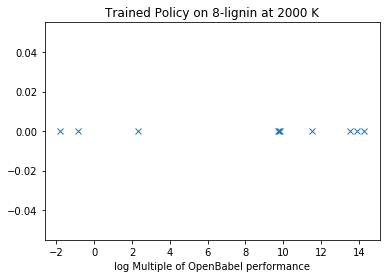

In [10]:
plt.plot(np.log(output), np.zeros_like(output), 'x')
plt.title('Trained Policy on 8-lignin at 2000 K')
plt.xlabel('log Multiple of OpenBabel performance')

Text(0.5, 0, 'log Multiple of OpenBabel performance')

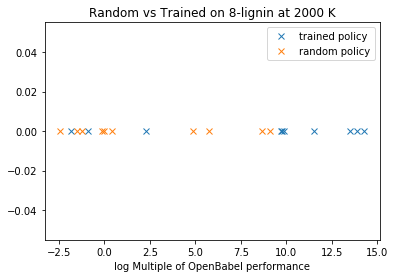

In [11]:
plt.plot(np.log(output), np.zeros_like(output), 'x', label='trained policy')
plt.plot(np.log(other_reward_list), np.zeros_like(other_reward_list), 'x', label='random policy')
plt.legend()
plt.title('Random vs Trained on 8-lignin at 2000 K')
plt.xlabel('log Multiple of OpenBabel performance')

In [12]:
np.median(np.log(output))

9.80387744785315

In [13]:
np.median(np.log(other_reward_list))

0.22082039371329862

In [14]:
import torch

In [22]:
torch.cuda.memory_stats()['reserved_bytes.all.allocated'] 

27262976

In [31]:
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   20904 KB |   21676 KB |   45671 KB |   24766 KB |
|       from large pool |   16384 KB |   16384 KB |   32768 KB |   16384 KB |
|       from small pool |    4520 KB |    5292 KB |   12903 KB |    8382 KB |
|---------------------------------------------------------------------------|
| Active memory         |   20904 KB |   21676 KB |   45671 KB |   24766 KB |
|       from large pool |   16384 KB |   16384 KB |   32768 KB |

In [36]:
torch.cuda.memory_reserved() / (1024 * 1024)

26.0

In [37]:
torch.cuda.empty_cache()
